*Made By [Adnan](https://linktr.ee/adnaaaen)*

# ***AQI Initial Data Exploration & Data Cleaning***

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from warnings import filterwarnings
import inflection
import os

plt.style.use("dark_background")
filterwarnings("ignore")

In [2]:
if not os.path.exists("../data/raw/city_hour.csv"):
    raise Exception("your need to download dataset, visit data/ folder in the root")
    
df = pd.read_csv("../data/raw/city_hour.csv")

### ***Initial Dataset Exploration***

##### **01-Tradational Analysis**

In [3]:
df_shape = df.shape
print(f"dataset have {df_shape[0]} rows & {df_shape[1]} columns")

dataset have 707875 rows & 16 columns


In [4]:
df.sample(5).reset_index()    # 5 random samples

,index,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,616110,Patna,2020-06-10 07:00:00,40.01,83.75,117.34,19.55,43.87,8.14,0.72,3.14,19.05,2.79,2.36,0.67,96.0,Satisfactory
1,290010,Delhi,2020-02-12 07:00:00,250.39,375.50,47.36,58.99,68.59,43.60,1.31,15.73,18.83,5.05,19.34,0.45,343.0,Very Poor
2,519692,Lucknow,2020-01-09 07:00:00,83.51,NaN,34.53,64.75,62.13,41.39,1.29,9.35,13.80,2.53,3.34,NaN,283.0,Poor
3,366179,Hyderabad,2016-11-30 13:00:00,51.00,115.75,7.33,48.93,6.93,19.58,0.21,14.70,75.00,0.03,0.07,0.03,98.0,Satisfactory
4,261988,Delhi,2016-12-01 17:00:00,207.62,430.75,11.68,92.99,40.25,79.81,0.75,18.99,38.44,4.12,9.31,NaN,426.0,Severe


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [6]:
df.describe()          # summary statstics of numerical columns

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


In [7]:
df.describe(include="O")       # summary statstics of categorical columns

,City,Datetime,AQI_Bucket
count,707875,707875,578795
unique,26,48192,6
top,Ahmedabad,2020-06-29 01:00:00,Moderate
freq,48192,26,198991


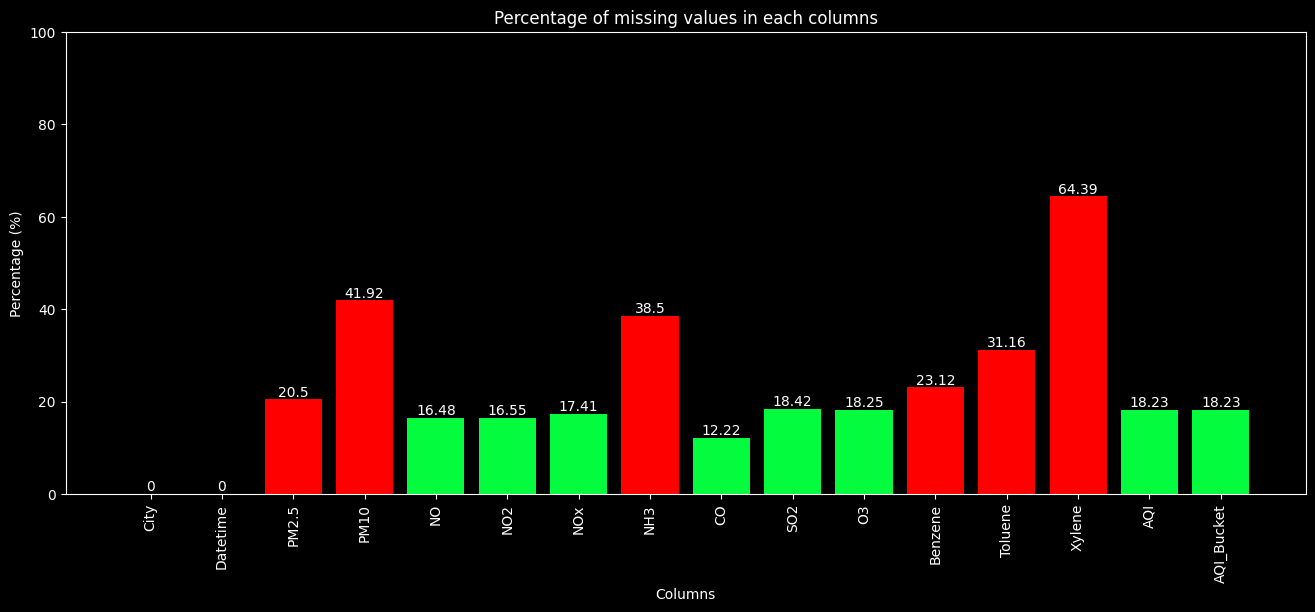

In [8]:
# percentage of missing values in each columns
nan_percentage = list(map(lambda x: round(x, 2), list(df.isna().mean() * 100)))  

plt.figure(figsize=(16, 6))

# conditional formatting : red if  percentage greater than 20 else green
conditional_colors = ["#03fc3d" if each < 20 else "red" for each in nan_percentage]  

fig = plt.bar(x=df.columns, height=nan_percentage, color=conditional_colors)
plt.xticks(rotation=90)
plt.bar_label(fig)
plt.title("Percentage of missing values in each columns")
plt.ylabel("Percentage (%)")
plt.xlabel("Columns")
plt.ylim(0,100)
plt.show()

### ***Data Cleaning***

##### **01-Remove Unwanted Feature**

In [9]:
"""AQI_Bucket is only derived from the AQI index and does not add independent information, it should be remove"""
df = df.drop(["AQI_Bucket"], axis=1)

##### **02-Data Type Conversion**

In [10]:
df.dtypes    # before

City         object
Datetime     object
PM2.5       float64
PM10        float64
NO          float64
NO2         float64
NOx         float64
NH3         float64
CO          float64
SO2         float64
O3          float64
Benzene     float64
Toluene     float64
Xylene      float64
AQI         float64
dtype: object

In [11]:
df["Datetime"] = pd.to_datetime(df["Datetime"])     # convert datetime columns (type: object) to (type: datetime)
df.dtypes    # after

City                object
Datetime    datetime64[ns]
PM2.5              float64
PM10               float64
NO                 float64
NO2                float64
NOx                float64
NH3                float64
CO                 float64
SO2                float64
O3                 float64
Benzene            float64
Toluene            float64
Xylene             float64
AQI                float64
dtype: object

##### **03-convert column name style into snake_case**

In [12]:
df.columns     # before

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [13]:
df.columns = [inflection.underscore(column) for column in df.columns]
df.columns     # after

Index(['city', 'datetime', 'pm2.5', 'pm10', 'no', 'no2', 'n_ox', 'nh3', 'co',
       'so2', 'o3', 'benzene', 'toluene', 'xylene', 'aqi'],
      dtype='object')

##### **04-Remove Duplicate Samples**

In [14]:
df[df.duplicated()]    # as we can see there is no duplicated samples

,city,datetime,pm2.5,pm10,no,no2,n_ox,nh3,co,so2,o3,benzene,toluene,xylene,aqi


##### **05-Handle Missing Values**

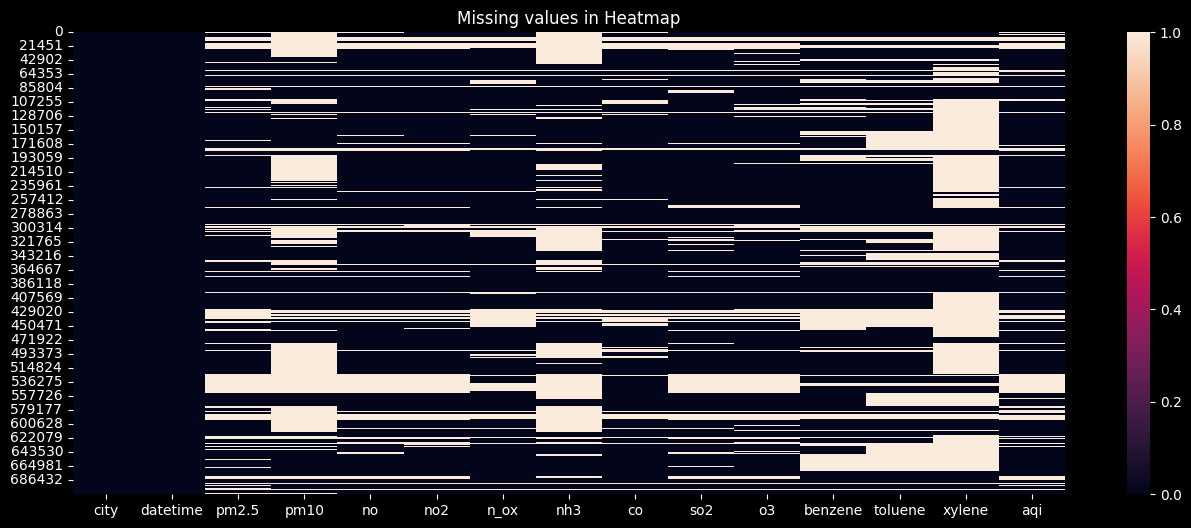

In [15]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isna())
plt.title("Missing values in Heatmap")
plt.show()

**condition**

**-> if `missing value count > 50%` then `drop column/row`**

**-> if `missing value count < 20` then `use simple imputers`**

**-> if `missing value count between 50 and 20` then `use knn imputer`**

In [16]:
print(df.isna().mean()*100)

city         0.000000
datetime     0.000000
pm2.5       20.496274
pm10        41.919407
no          16.476355
no2         16.545577
n_ox        17.407593
nh3         38.501430
co          12.222073
so2         18.417517
o3          18.252940
benzene     23.117923
toluene     31.164683
xylene      64.393996
aqi         18.234858
dtype: float64


In [17]:
"""
> drop column & rows which have missing values > 50%
"""
unwanted_col = df.columns[df.isna().mean() * 100 > 50]
df = df.drop(unwanted_col, axis=1)    # for columns

df = df.loc[df.isna().mean(axis=1)*100 < 50]    # for rows

In [18]:
df.isna().mean()*100

city         0.000000
datetime     0.000000
pm2.5        6.867744
pm10        31.960670
no           2.089887
no2          2.303642
n_ox         7.510505
nh3         28.235148
co           3.756249
so2          4.723380
o3           4.483217
benzene     15.624574
toluene     24.964872
aqi          5.591523
dtype: float64

In [19]:
"""
> TARGET COLUMN : aqi
> we cannot impute missing values in TARGET VARIABLE 
> it just 5%, so we can drop those samples
"""
df = df.loc[df["aqi"].dropna().index]

In [20]:
numeric_cols = df.select_dtypes(np.number).columns
categorical_cols = df.select_dtypes("object").columns

**Skewness of numerical columns**

In [21]:
"""
> calculate skewness of columns by dictionary comprehension
"""
skewness = {col : round(df[col].skew(),5) for col in numeric_cols}

**Median imputer**

In [22]:
"""
> All the columns follow positive skewness, so we can choose imputer as median
> Handle missing values with median
"""
missing_cols = df.columns[df.isna().mean()*100 > 0]
median_imputer = SimpleImputer(strategy="median")
for each in missing_cols:
    df[each] = median_imputer.fit_transform(df[each].to_numpy().reshape(-1, 1))

In [23]:
df.isna().mean()*100

city        0.0
datetime    0.0
pm2.5       0.0
pm10        0.0
no          0.0
no2         0.0
n_ox        0.0
nh3         0.0
co          0.0
so2         0.0
o3          0.0
benzene     0.0
toluene     0.0
aqi         0.0
dtype: float64

In [24]:
df = df.reset_index().drop("index", axis=1)

##### **05-Outlier Treatment**

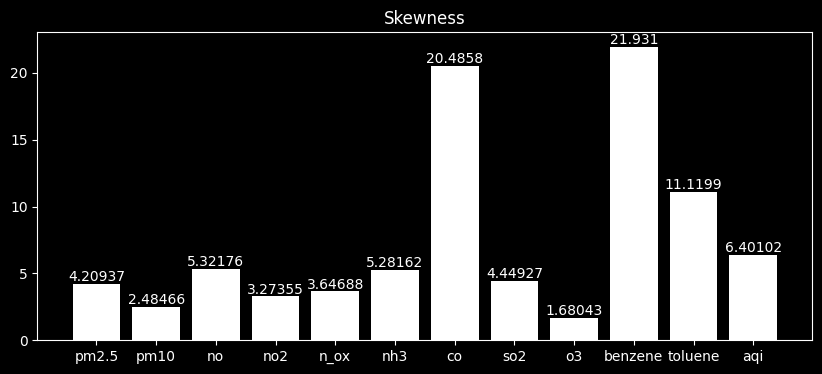

In [25]:
plt.figure(figsize=(10,4))

fig = plt.bar(x=skewness.keys(), height=skewness.values(), color="white")
plt.title("Skewness")
plt.bar_label(fig)
plt.show()

# as we can see, each column follow positve skewness

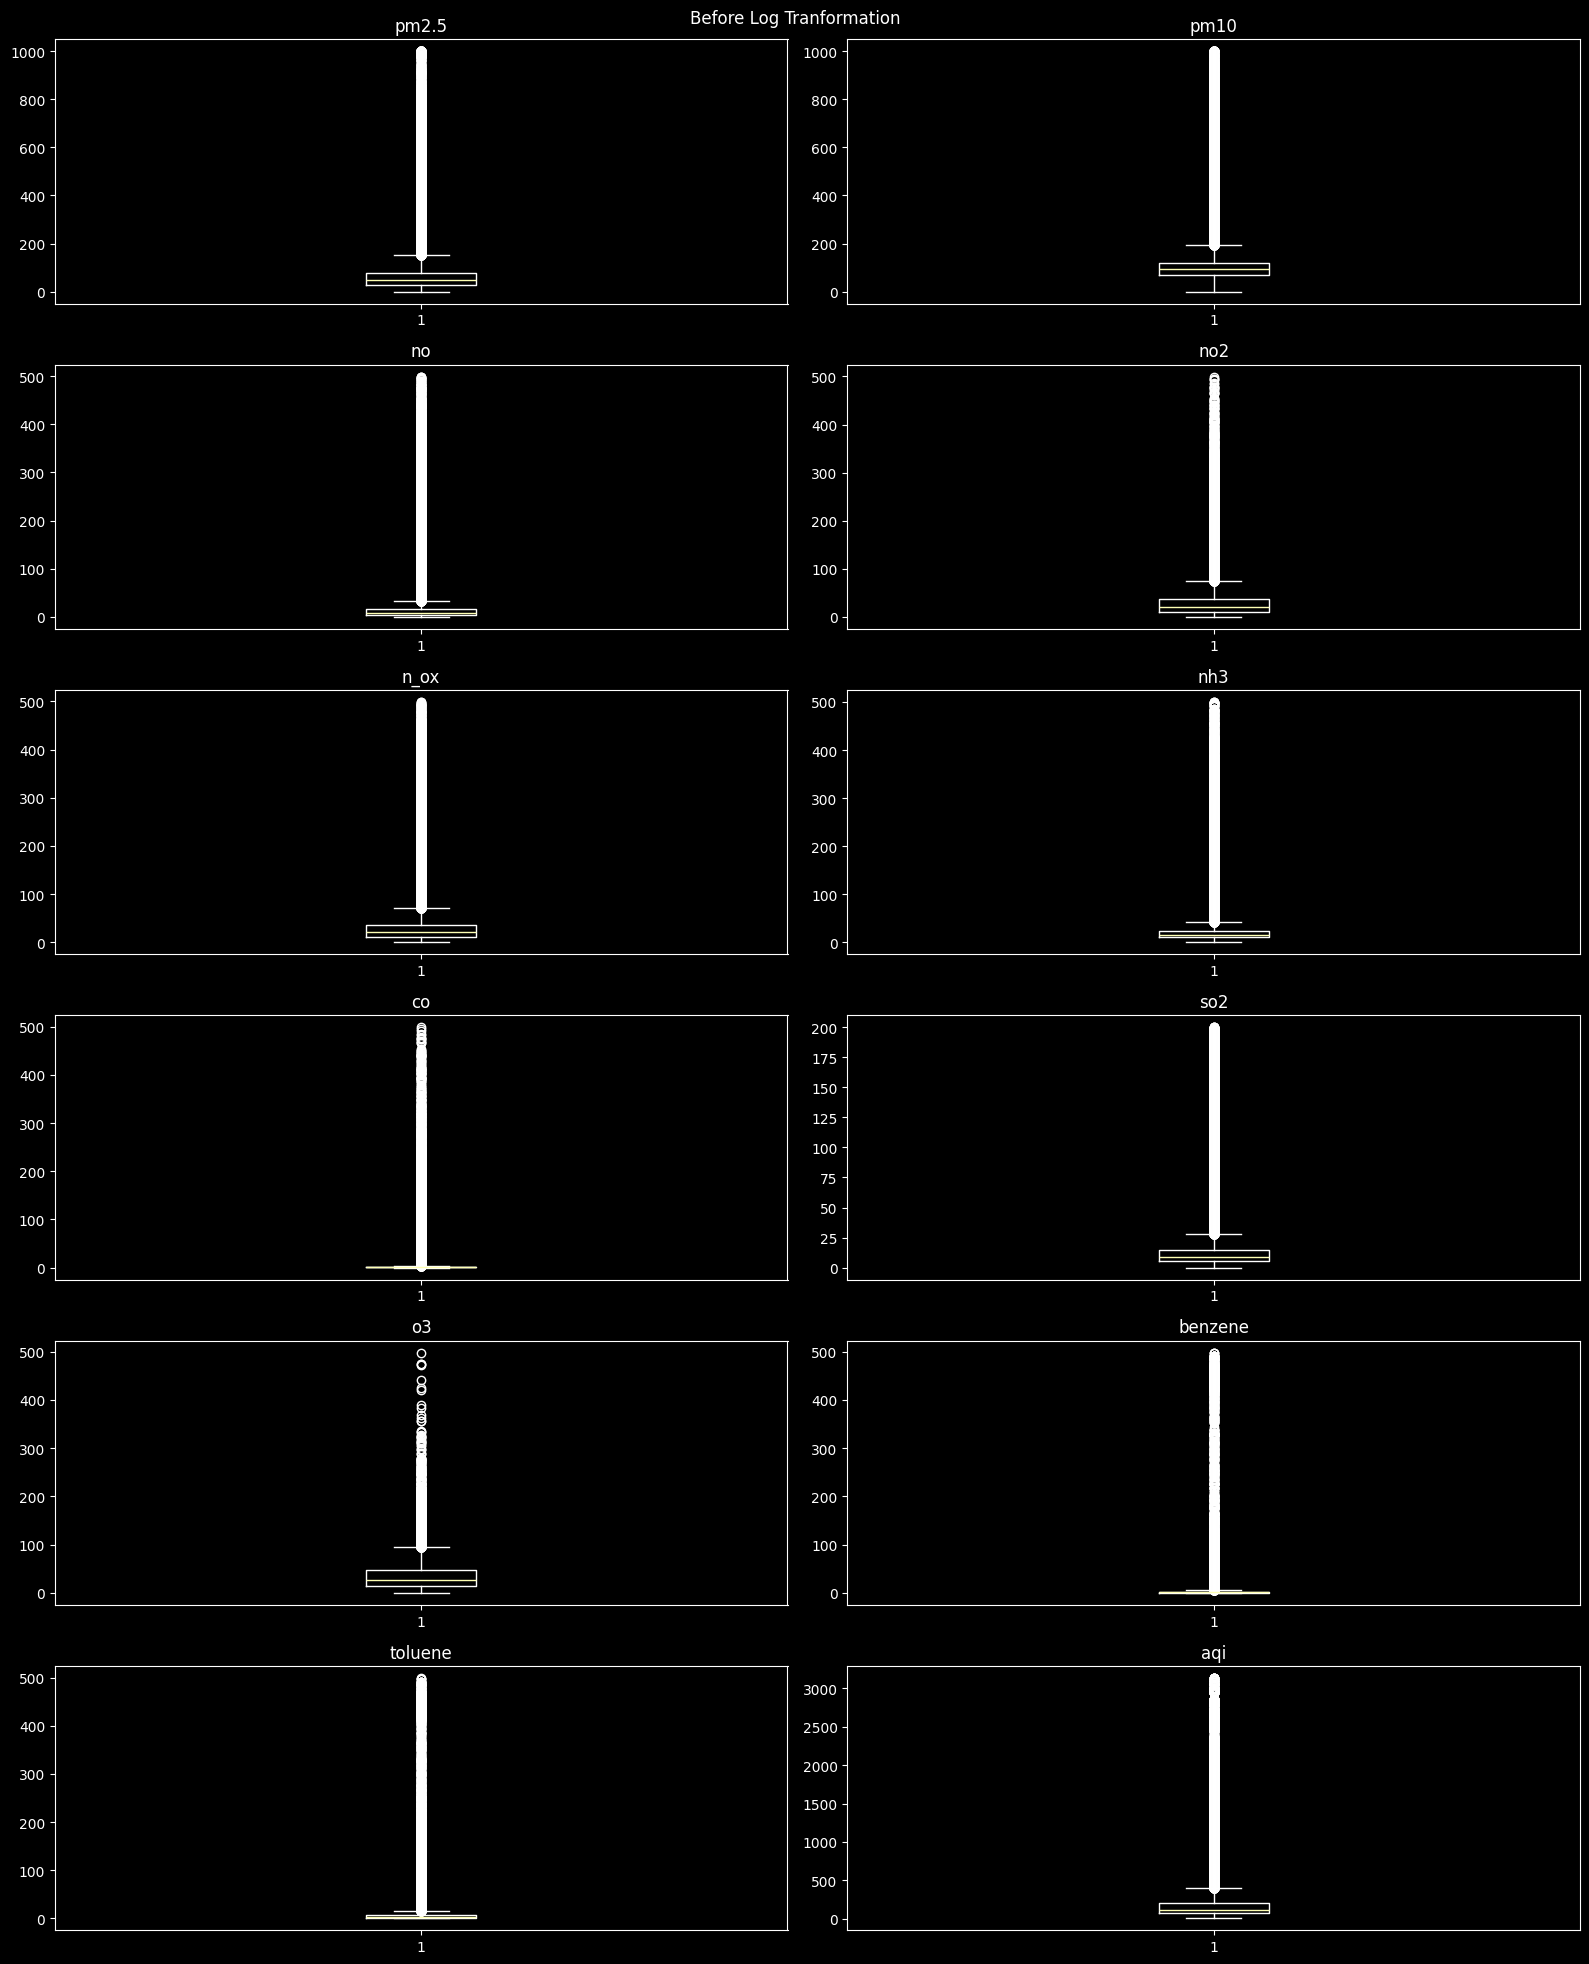

In [26]:
plt.figure(figsize=(16,20))
for i, column in enumerate(numeric_cols):
    plt.suptitle("Before Log Tranformation")
    plt.subplot(6, 2, i+1)
    plt.title(column)
    plt.boxplot(df[column])
plt.tight_layout()

In [27]:
"""
> as we can see all the column outlier's upper whisker is longer that lower whisker
> if all the column follow positive skew, we should perform Log Transform as outlier treat.
"""

"\n> as we can see all the column outlier's upper whisker is longer that lower whisker\n> if all the column follow positive skew, we should perform Log Transform as outlier treat.\n"

In [28]:
newdf = df.copy(deep=True)
for column in numeric_cols:
    newdf[column] = np.log(df[column].clip(lower=0) + 1)

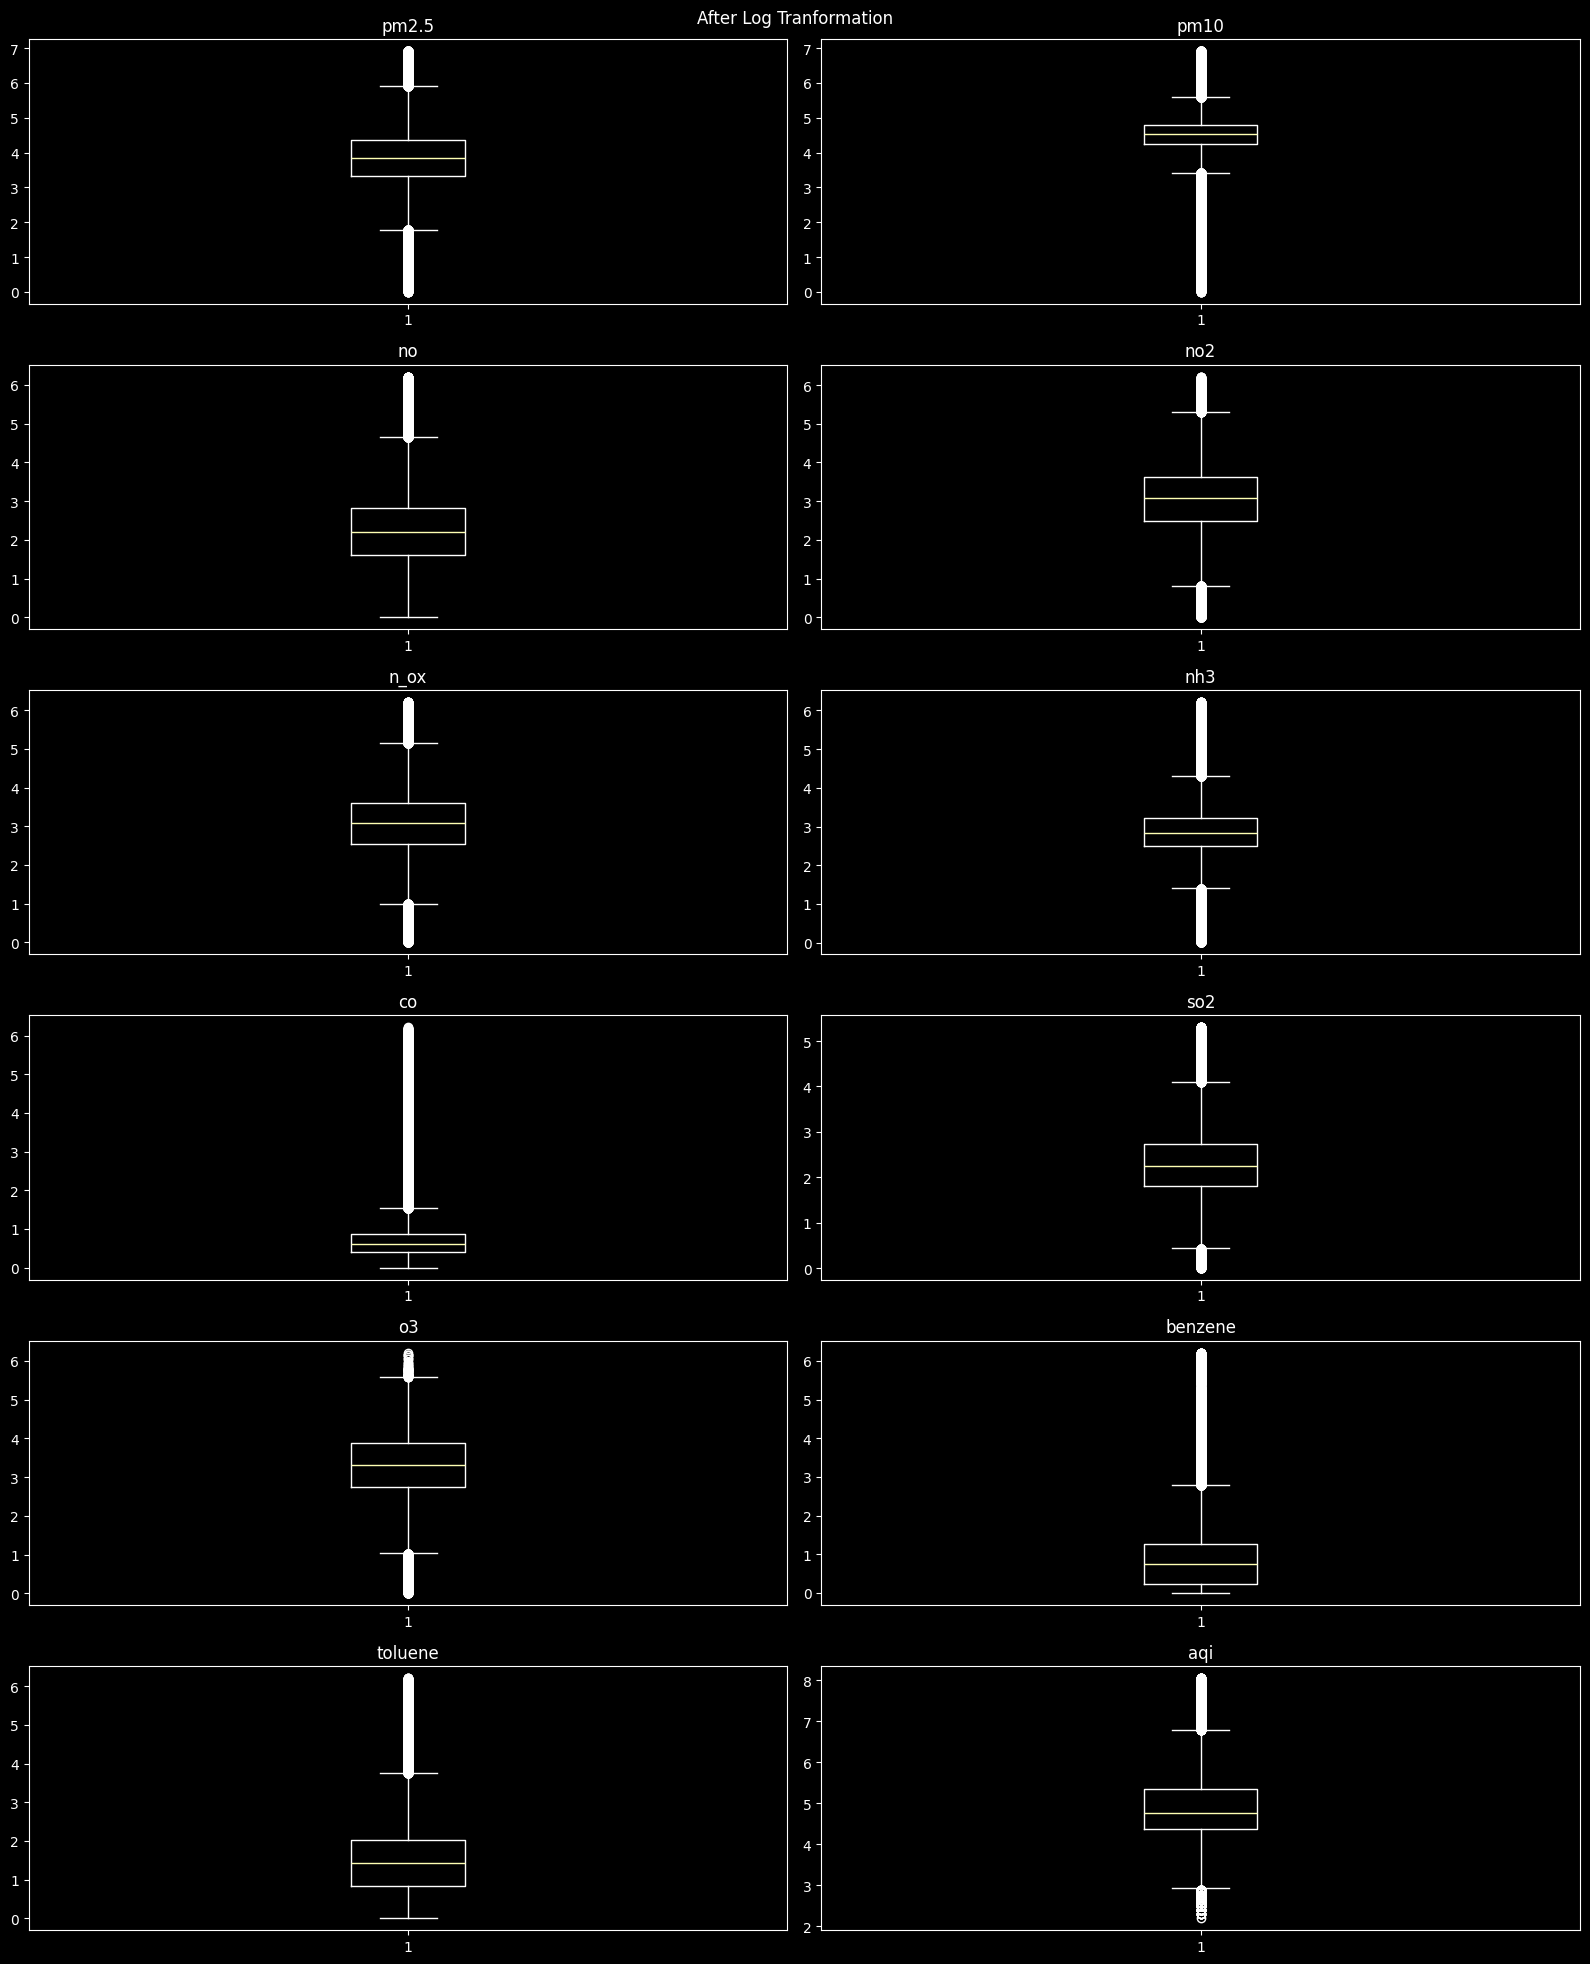

In [29]:
plt.figure(figsize=(16,20))
for i, column in enumerate(numeric_cols):
    plt.suptitle("After Log Tranformation")
    plt.subplot(6, 2, i+1)
    plt.title(column)
    plt.boxplot(newdf[column])
plt.tight_layout()

**Save cleaned dataset**

In [30]:
if not os.path.exists("../data/cleaned"):
    os.mkdir("../data/cleaned")
    
newdf.to_csv("../data/cleaned/cleaned.csv", index=False, date_format="%Y-%m-%d %H:%M:%S")
print("cleaned dataset saved successfully")

cleaned dataset saved successfully


***Next: EDA***